# CH3. 신경망

## 3.2 활성화 함수

### 3.2.2 계단 함수 구현하기

In [1]:
#넘파이 배열을 인수로 받을 수 없음  
def step_function(x):
  if x > 0:
    return 1
  else:
    return 0

In [2]:
#넘파이 배열을 인수로 받을 수 있음
import numpy as np

def step_functionx(x):
  y = x > 0
  return y.astype(np.int)

In [3]:
x = np.array([-1.0, 1.0, 2.0])
x

array([-1.,  1.,  2.])

In [4]:
#넘파이 배열에 부등호 연산을 수행하면 배열의 원소 각각에 부등호 연산을 수행한 bool 배열 생성
y = x > 0
y

array([False,  True,  True])

In [5]:
#bool을 int로 변환하면 True는 1, False는 0으로 변환
y = y.astype(np.int)
y

<ipython-input-5-27fd047ac683>:2: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = y.astype(np.int)


array([0, 1, 1])

### 3.2.3 계단 함수의 그래프

<ipython-input-6-1a135e813700>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.array(x > 0, dtype = np.int)


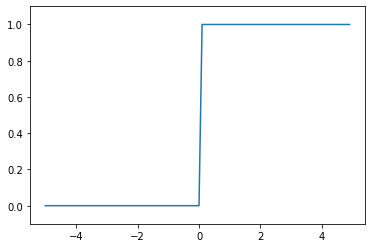

In [6]:
import matplotlib.pyplot as plt

def step_function(x):
  return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.4 시그모이드 함수 구현하기

In [7]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

In [8]:
#넘파이 배열을 인수로 받을 수 있다
x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

In [9]:
#넘파이의 브로드캐스트
#브로드캐스트 : 넘파이 배열과 스칼라값의 연산을 넘파이 배열의 원소 각각과 스칼라값의 연산으로 바꿔 수행
t = np.array([1.0, 2.0, 3.0])
print(1.0 + t)
print(1.0/t)

[2. 3. 4.]
[1.         0.5        0.33333333]


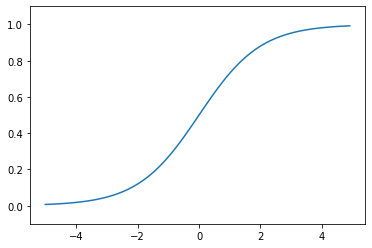

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)
plt.plot(x,y)
plt.ylim(-0.1, 1.1)
plt.show()

### 3.2.7 ReLU 함수

In [11]:
def relu(x):
  return np.maximum(0, x)

<br>

## 3.3 다차원 배열의 계산

### 3.3.1 다차원 배열

In [12]:
#1차원 배열
A = np.array([1,2,3,4])
print(A)
print(np.ndim(A))
print(A.shape)
print(A.shape[0])

[1 2 3 4]
1
(4,)
4


In [13]:
#2차원 배열
B = np.array([[1,2],[3,4],[5,6]])
print(B)
print(np.ndim(B))
print(B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
(3, 2)


### 3.3.2 행렬의 곱

In [14]:
A = np.array([[1,2],[3,4]])
print(A.shape)

B = np.array([[5,6],[7,8]])
print(B.shape)

print(np.dot(A, B))

(2, 2)
(2, 2)
[[19 22]
 [43 50]]


In [15]:
A = np.array([[1,2,3],[4,5,6]])
print(A.shape)

B = np.array([[1,2],[3,4],[5,6]])
print(B.shape)

print(np.dot(A,B))

(2, 3)
(3, 2)
[[22 28]
 [49 64]]


In [16]:
A = np.array([[1,2],[3,4],[5,6]])
print(A.shape)

B = np.array([7,8])
print(B.shape)

print(np.dot(A, B))

(3, 2)
(2,)
[23 53 83]


### 3.3.3 신경망에서의 행렬 곱

In [17]:
X = np.array([1,2])
print(X.shape)

W = np.array([[1,3,5],[2,4,6]])
print(W.shape)

Y = np.dot(X, W)
print(Y)

(2,)
(2, 3)
[ 5 11 17]


<br>

## 3.4 3층 신경망 구현하기

### 3.4.2 각 층의 신호 전달 구현하기

In [18]:
#입력층에서 1층으로 신호 전달
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(W1.shape)
print(X.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2, 3)
(2,)
(3,)
[0.3 0.7 1.1]


In [19]:
#1층의 활성화 함수에서의 처리
Z1 = sigmoid(A1)

print(A1)
print(Z1)

[0.3 0.7 1.1]
[0.57444252 0.66818777 0.75026011]


In [20]:
#1층에서 2층으로의 신호 전달
W2 = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
B2 = np.array([[0.1, 0.2]])

print(Z1.shape)
print(W2.shape)
print(B2.shape)

A2 = np.dot(Z1, W2) + B2
print(A2)

(3,)
(3, 2)
(1, 2)
[[0.51615984 1.21402696]]


In [21]:
#2층의 활성화 함수에서의 처리
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[[0.51615984 1.21402696]]
[[0.62624937 0.7710107 ]]


In [22]:
#2층에서 출력층으로의 신호 전달
W3 = np.array([[0.1, 0.3], [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
print(A3)

[[0.31682708 0.69627909]]


In [23]:
#촐력층의 활성화 함수에서의 처리
def identify_function(x):
  return x

Y = identify_function(A3) #혹은 Y = A3
print(Y)

[[0.31682708 0.69627909]]


### 3.4.3 구현 정리

In [24]:
def init_network():
  network = {}
  network['W1'] = np.array([[0.1, 0.3, 0.5], [0.2, 0.4, 0.6]])
  network['b1'] = np.array([0.1, 0.2, 0.3])
  network['W2'] = np.array([[0.1, 0.4], [0.2, 0.5], [0.3, 0.6]])
  network['b2'] = np.array([[0.1, 0.2]])
  network['W3'] = np.array([[0.1, 0.3], [0.2, 0.4]])
  network['b3'] = np.array([0.1, 0.2])
  
  return network

def forward(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3
  y = identify_function(a3)

  return y

network = init_network()
x = np.array([1.0, 0.5])
y = forward(network, x)
print(y)

[[0.31682708 0.69627909]]


<br>

## 3.5 출력층 설계하기

### 3.5.1 항등 함수와 소프트맥스 함수 구현하기

In [25]:
a = np.array([0.3, 2.9, 4.0])
exp_a = np.exp(a)
print(exp_a)

sum_exp_a = np.sum(exp_a)
print(sum_exp_a)

y = exp_a/sum_exp_a
print(y)

[ 1.34985881 18.17414537 54.59815003]
74.1221542101633
[0.01821127 0.24519181 0.73659691]


In [26]:
def softmax(a):
  exp_a = np.exp(a)
  sum_exp_a = np.sum(a)
  y = exp_a / sum_exp_a
  
  return y

### 3.5.2 소프트맥스 함수 구현 시 주의점

In [27]:
#위와 같이 구현하면 overflow가 발생
a = np.array([1010, 1000, 990])
print(np.exp(a) / np.sum(np.exp(a)))

[nan nan nan]


<ipython-input-27-5db3ed1f9c14>:3: RuntimeWarning: overflow encountered in exp
  print(np.exp(a) / np.sum(np.exp(a)))
<ipython-input-27-5db3ed1f9c14>:3: RuntimeWarning: invalid value encountered in true_divide
  print(np.exp(a) / np.sum(np.exp(a)))


In [28]:
#입력 신호 중 최댓값을 빼서 overflow 방지
c = np.max(a)
print(a-c)

print(np.exp(a-c)/np.sum(np.exp(a-c)))

[  0 -10 -20]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


In [29]:
# overflow 방지하는 softmax 함수 구현
def softmax(a):
  c = np.max(a)
  exp_a = np.exp(a-c)
  sum_exp_a = np.sum(exp_a)
  y = exp_a / sum_exp_a

  return y

### 3.5.3 소프트맥스 함수의 특징

In [30]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


<br>

## 3.6 손글씨 숫자 인식

### 3.6.1 MNIST 데이터셋

In [31]:
import sys, os
from tensorflow.keras.datasets import mnist

In [32]:
(x_train, t_train), (x_test, t_test) = mnist.load_data()

print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_train.shape)

11490434/11490434 [==============================] - 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(60000,)


In [33]:
#flatten
x_train = x_train.reshape(-1, x_train.shape[1]*x_train.shape[2])
x_test = x_test.reshape(-1, x_test.shape[1]*x_test.shape[2])

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [34]:
from PIL import Image

In [35]:
img = x_train[0]
label = t_train[0]
print(label)

5


In [36]:
print(img.shape)

(784,)


In [37]:
img = img.reshape(28, 28)
print(img.shape)

(28, 28)


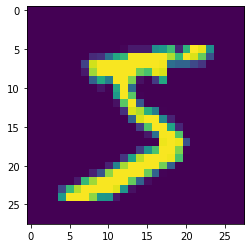

In [38]:
import matplotlib.pyplot as plt
plt.imshow(img)

### 3.6.2 신경망의 추론 처리

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
import sys, os
sys.path.append('/content/drive/MyDrive/Colab Notebooks')
from mnist import load_mnist

In [48]:
import pickle
def get_data():
  (x_train, t_train), (x_test, t_test) = \
    load_mnist(normalize = True, flatten = True, one_hot_label = False)
  
  return x_test, t_test

def init_network():
  with open('/content/drive/MyDrive/Colab Notebooks/sample_weight.pkl', 'rb') as f:
    network = pickle.load(f) #학습된 가중치 매개변수를 읽음
  
  return network

def predict(network, x):
  W1, W2, W3 = network['W1'], network['W2'], network['W3']
  b1, b2, b3 = network['b1'], network['b2'], network['b3']

  a1 = np.dot(x, W1) + b1
  z1 = sigmoid(a1)

  a2 = np.dot(z1, W2) + b2
  z2 = sigmoid(a2)

  a3 = np.dot(z2, W3) + b3
  y = softmax(a3)

  return y

In [49]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0 #정확도 측정을 위해
for i in range(len(x)):
  y = predict(network, x[i])
  p = np.argmax(y) #확률이 가장 높은 원소의 인덱스를 얻음
  if p == t[i]:
    accuracy_cnt += 1

print('Accuracy: '+str(float(accuracy_cnt / len(x))))

Accuracy: 0.9352


### 3.6.3 배치(batch) 처리

배치(batch) : 하나로 묶은 입력 데이터

In [50]:
#배치 처리의 구현
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(0, len(x), batch_size):
  x_batch = x[i:i+batch_size] #x를 배치 사이즈만큼 묶음
  y_batch = predict(network, x_batch)
  p = np.argmax(y_batch, axis = 1) #각 행(1번쨰 차원)에서 최댓값을 갖는 인덱스 출력
  accuracy_cnt += np.sum(p == t[i:i+batch_size]) #bool 배열에서 True가 몇 개 인지 counting

print('Accuracy : ' +str(float(accuracy_cnt)/len(x)))

Accuracy : 0.9352
